In [1]:
import math
from scipy import stats
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from pydataset import data
import statistics
import seaborn as sns
from pydataset import data

import acquire as aq
import prepare as prep

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Data Acquisition Exercises

4. *In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.*

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables

In [2]:
df_iris = data('iris')

In [3]:
#First 3 rows
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
#Print number of rows and columns 
df_iris.shape

(150, 5)

In [5]:
#Print column names
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
#Print data type of each column
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
#Print summary statistics
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


5. *Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.*

Make sure that the spreadsheet is publicly visible under your sharing settings.

- assign the first 100 rows to a new dataframe, df_google_sheets_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [8]:
# Reading google sheet into data frame

sheet_url = 'https://docs.google.com/spreadsheets/d/1qyreW29fvdvr8IIh23p0LyV2eL-kPs2v8tJf5-03k1s/edit#gid=1023018493'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google_sheets = pd.read_csv(csv_export_url)
df_google_sheets.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


In [9]:
#Assign first 100 to new dataframe
df_google_sheets_sample = df_google_sheets.head(100)

In [10]:
#Print number of rows of original
len(df_google_sheets)

7049

In [11]:
#Print first 5 column names 
df_google_sheets.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [12]:
#Print the column names with data type of object
df_google_sheets.dtypes[df_google_sheets.dtypes == 'object']

customer_id     object
gender          object
partner         object
dependents      object
payment_type    object
churn           object
dtype: object

In [13]:
#Checking for numeric variable types
df_google_sheets.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [14]:
#Compute the range for each of the numeric variables
numeric_variables = df_google_sheets.select_dtypes(include=['float64', 'int64'])
numeric_variables.max() - numeric_variables.min()

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

6. *Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.*

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [15]:
#Reading excel file into dataframe
df_excel = pd.read_excel('copy_innis_spreadsheet_exercises.xlsx')
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.9,267.40,Yes


In [16]:
#Assign first 100 rows to new dataframe
df_excel_sample = df_excel.head(100)

In [17]:
#Print number of rows of original
len(df_excel)

7049

In [18]:
#Print first 5 column names
df_excel.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [19]:
#Print the column names with data type of object
df_excel.dtypes[df_excel.dtypes == 'object']

customer_id     object
gender          object
partner         object
dependents      object
payment_type    object
churn           object
dtype: object

In [20]:
#Compute the range for each of the numeric variables
numeric_variables = df_excel.select_dtypes(include=['float64', 'int64'])
numeric_variables.max() - numeric_variables.min()

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

7. *Read the data from this google sheet into a dataframe, df_google.*

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [21]:
#Reading google sheet into dataframe

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
#Print first 3 rows
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
#Print number of rows and columns
df_google.shape

(891, 12)

In [24]:
#Print column names
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
#Print datatype of each column
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
#Print summary statistics of each numeric variable 
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
#Print unique values for each of your categorical variables

categorical_values = df_google[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
for col in categorical_values.columns:
    print(col, categorical_values[col].dropna().unique())

Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q']


## Data Preparation Exercises

**Using the Iris Data:**

- Use the function defined in acquire.py to load the iris data.

In [28]:
iris = aq.get_iris_data()
iris.head()

Using cached csv...


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


- Drop the species_id and measurement_id columns.

In [29]:
iris = iris.drop(['species_id', 'measurement_id'], axis = 1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- Rename the species_name column to just species.

In [30]:
iris = iris.rename(columns={'species_name': 'species'})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [31]:
# Create dummy variables
dummy_iris = pd.get_dummies(iris[['species']], dummy_na = False, drop_first=True)
dummy_iris.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [32]:
# Concatenate onto original dataframe
iris = pd.concat([iris, dummy_iris], axis = 1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [33]:
def prep_iris(iris):
    iris = iris.drop(['species_id', 'measurement_id'], axis = 1)
    iris = iris.rename(columns={'species_name': 'species'})
    dummy_iris = pd.get_dummies(iris[['species']], dummy_na = False, drop_first=True)
    iris = pd.concat([iris, dummy_iris], axis = 1)
    return iris

In [34]:
# Testing my function by using it on a freshly acquired data set
iris = aq.get_iris_data()
iris.head()

Using cached csv...


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [35]:
prepped_iris_v0 = prep_iris(iris)
prepped_iris_v0.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


**Using the Titanic dataset:**
- Use the function defined in acquire.py to load the Titanic data.

In [36]:
titanic = aq.get_titanic_data()
titanic.head()

Using cached csv...


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


- Drop any unnecessary, unhelpful, or duplicated columns.

In [37]:
#Summarizing the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [38]:
# Dropping any possible duplicates
titanic.drop_duplicates(inplace= True)
titanic.shape

(891, 13)

In [39]:
# Creating variable with columns to drop
# Dropping columns with too many missing to have any value right now
# Dropping columns that duplicate data, reducing redundancy

columns_to_drop = ['deck', 'age', 'embarked', 'class', 'passenger_id']

In [40]:
titanic = titanic.drop(columns = columns_to_drop)
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1


In [41]:
# Imputing for two missing values in embark_town with most common value
titanic['embark_town'] = titanic.embark_town.fillna('Southampton')

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [42]:
# Creating dummy variables 
dummy_titanic = pd.get_dummies(titanic[['sex', 'embark_town']], 
                         dummy_na = False, 
                         drop_first = [True, True])
dummy_titanic.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [43]:
# Concatenate onto original dataframe
titanic = pd.concat([titanic, dummy_titanic], axis = 1)
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


- Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [44]:
def prep_titanic(titanic):
    titanic.drop_duplicates(inplace= True)
    columns_to_drop = ['deck', 'age', 'embarked', 'class', 'passenger_id']
    titanic = titanic.drop(columns = columns_to_drop)
    titanic['embark_town'] = titanic.embark_town.fillna('Southampton')
    dummy_titanic = pd.get_dummies(titanic[['sex', 'embark_town']], 
                         dummy_na = False, 
                         drop_first = [True, True])
    titanic = pd.concat([titanic, dummy_titanic], axis = 1)
    return titanic.drop(columns=['sex', 'embark_town'])

In [45]:
# Testing my function by using it on a freshly acquired data set
titanic = aq.get_titanic_data()
titanic.head()

Using cached csv...


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [46]:
prepped_titanic_v0 = prep_titanic(titanic)
prepped_titanic_v0.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1


**Using the Telco dataset:**
- Use the function defined in acquire.py to load the Telco data.

In [47]:
telco = aq.get_telco_data()
telco.head()

Using cached csv...


,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


- Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [48]:
# Summarizing data
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

## Takeaways from Summarizing
- No null values detected
- contract_type, payment_type, and internet_service_type are all duplicated with their associated id columns. I'll drop the id columns and keep the columns with string values to make dummy variables with later. 
- Would need to convert total_charges to a numerical value -- but because this columns is duplicated info (we already have monthly charges and tenure) I'll just drop it entirely
- We will need to convert the columns with 'yes, no' into binary boolean values: '0, 1'
- Columns I deem unnecessary/unhelpful: customer_id, streaming_tv, streaming_movies, online_security, online_backup, device_protection, tech_support, contract_type, payment_type, internet_service_type

In [49]:
# For posterity
telco.drop_duplicates(inplace = True)
telco.shape

(7043, 24)

In [50]:
# Converting total_charges to numerical form
telco['total_charges'] = telco['total_charges'].str.strip()
telco = telco[telco.total_charges != '']
telco['total_charges'] = telco.total_charges.astype(float)

In [51]:
# Creating variable with columns to drop
columns_to_drop = ['customer_id', 'streaming_tv', 'streaming_movies', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'contract_type_id', 'payment_type_id', 'internet_service_type_id']

In [52]:
# Dropping the columns
telco = telco.drop(columns = columns_to_drop)
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,Female,0,Yes,Yes,9,Yes,No,Yes,65.6,593.30,No,One year,Mailed check,DSL
1,Male,0,No,No,9,Yes,Yes,No,59.9,542.40,No,Month-to-month,Mailed check,DSL
2,Male,0,No,No,4,Yes,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,Male,1,Yes,No,13,Yes,No,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,Female,1,Yes,No,3,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Mailed check,Fiber optic


In [53]:
#Diving numerical and categorical columns
numcols = [col for col in telco.columns if telco[col].dtype != 'O']
catcols = [col for col in telco.columns if telco[col].dtype == 'O']

In [54]:
telco[numcols].head()

,senior_citizen,tenure,monthly_charges,total_charges
0,0,9,65.6,593.30
1,0,9,59.9,542.40
2,0,4,73.9,280.85
3,1,13,98.0,1237.85
4,1,3,83.9,267.40


In [55]:
telco[catcols].head()

,gender,partner,dependents,phone_service,multiple_lines,paperless_billing,churn,contract_type,payment_type,internet_service_type
0,Female,Yes,Yes,Yes,No,Yes,No,One year,Mailed check,DSL
1,Male,No,No,Yes,Yes,No,No,Month-to-month,Mailed check,DSL
2,Male,No,No,Yes,No,Yes,Yes,Month-to-month,Electronic check,Fiber optic
3,Male,Yes,No,Yes,No,Yes,Yes,Month-to-month,Electronic check,Fiber optic
4,Female,Yes,No,Yes,No,Yes,Yes,Month-to-month,Mailed check,Fiber optic


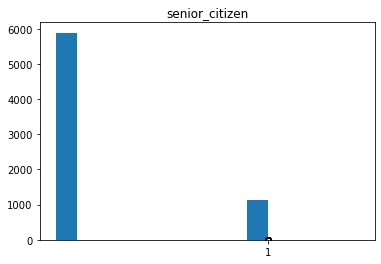

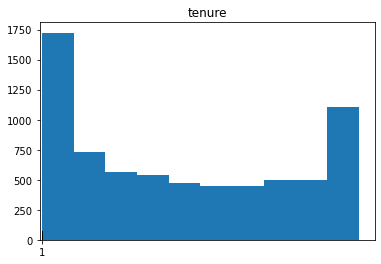

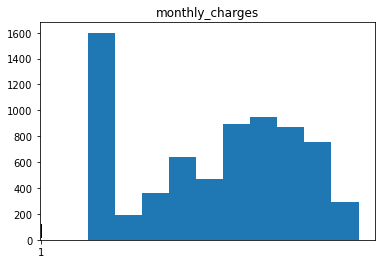

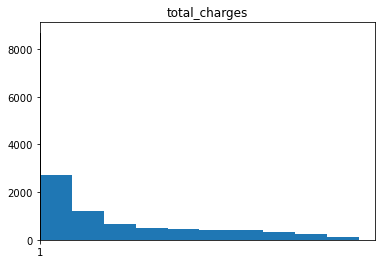

In [56]:
for col in numcols:
    plt.hist(telco[col])
    plt.title(col)
    plt.show
    plt.boxplot(telco[col])
    plt.title(col)
    plt.show()

In [57]:
#converting yes, no to 1,0 
telco['partner'] = telco.partner.map({'Yes': 1, 'No': 0})
telco['dependents'] = telco.dependents.map({'Yes': 1, 'No': 0})
telco['phone_service'] = telco.phone_service.map({'Yes': 1, 'No': 0})
telco['paperless_billing'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
telco['churn'] = telco.churn.map({'Yes': 1, 'No': 0})
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,Female,0,1,1,9,1,No,1,65.6,593.30,0,One year,Mailed check,DSL
1,Male,0,0,0,9,1,Yes,0,59.9,542.40,0,Month-to-month,Mailed check,DSL
2,Male,0,0,0,4,1,No,1,73.9,280.85,1,Month-to-month,Electronic check,Fiber optic
3,Male,1,1,0,13,1,No,1,98.0,1237.85,1,Month-to-month,Electronic check,Fiber optic
4,Female,1,1,0,3,1,No,1,83.9,267.40,1,Month-to-month,Mailed check,Fiber optic


- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [58]:
# Creating the dummy variables

dummy_telco = pd.get_dummies(telco[['gender','contract_type', 'payment_type', 'internet_service_type']], 
                         dummy_na = False, 
                         drop_first = [True, True])
dummy_telco.head()

,gender_Male,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0
2,1,0,0,0,1,0,1,0
3,1,0,0,0,1,0,1,0
4,0,0,0,0,0,1,1,0


In [59]:
# Concatenating onto original dataframe
telco = pd.concat([telco, dummy_telco], axis = 1)
# Will need to drop the columns used to make dummies
telco = telco.drop(columns= ['gender', 'contract_type', 'payment_type', 'internet_service_type'])

telco.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,gender_Male,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
0,0,1,1,9,1,No,1,65.6,593.30,0,0,1,0,0,0,1,0,0
1,0,0,0,9,1,Yes,0,59.9,542.40,0,1,0,0,0,0,1,0,0
2,0,0,0,4,1,No,1,73.9,280.85,1,1,0,0,0,1,0,1,0
3,1,1,0,13,1,No,1,98.0,1237.85,1,1,0,0,0,1,0,1,0
4,1,1,0,3,1,No,1,83.9,267.40,1,0,0,0,0,0,1,1,0


- Extra step for practice: Splitting the data

In [60]:
train_validate, test = train_test_split(telco, test_size=.2,
                                       random_state=123,
                                       stratify=telco.churn)

train, validate = train_test_split(train_validate, test_size=.3,
                                  random_state=123,
                                  stratify=train_validate.churn)

In [61]:
train.shape

(3937, 18)

In [62]:
test.shape

(1407, 18)

In [63]:
validate.shape

(1688, 18)

- Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [64]:
# Extra step: Create function that splits the data

def split_telco_data(telco):
    train_validate, test = train_test_split(telco, test_size=.2,
                                       random_state=123,
                                       stratify=telco.churn)
    train, validate = train_test_split(train_validate, test_size=.3,
                                  random_state=123,
                                  stratify=train_validate.churn)
    return train, validate, test

In [65]:
def prep_telco(telco):
    telco.drop_duplicates(inplace = True)
    telco['total_charges'] = telco['total_charges'].str.strip()
    telco = telco[telco.total_charges != '']
    telco['total_charges'] = telco.total_charges.astype(float)
    columns_to_drop = ['customer_id', 'streaming_tv', 'streaming_movies', 'online_security', 'online_backup', 
                       'device_protection', 'tech_support', 'contract_type_id', 'payment_type_id', 
                       'internet_service_type_id']
    telco = telco.drop(columns = columns_to_drop)
    telco['partner'] = telco.partner.map({'Yes': 1, 'No': 0})
    telco['dependents'] = telco.dependents.map({'Yes': 1, 'No': 0})
    telco['phone_service'] = telco.phone_service.map({'Yes': 1, 'No': 0})
    telco['paperless_billing'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
    telco['churn'] = telco.churn.map({'Yes': 1, 'No': 0})
    dummy_telco = pd.get_dummies(telco[['gender','contract_type', 'payment_type', 'internet_service_type']], 
                         dummy_na = False, 
                         drop_first = [True, True])
    telco = pd.concat([telco, dummy_telco], axis = 1)
    telco = telco.drop(columns= ['gender', 'contract_type', 'payment_type', 'internet_service_type'])
    
    #Split the data using other function
    train, validate, test = split_telco_data(telco)
    
    return train, validate, test

In [66]:
# Get freshly acquired data set
telco = aq.get_telco_data()
telco.head()

Using cached csv...


,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


In [67]:
train, validate, test = prep_telco(telco)

In [68]:
# Validating that function worked
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   senior_citizen                        3937 non-null   int64  
 1   partner                               3937 non-null   int64  
 2   dependents                            3937 non-null   int64  
 3   tenure                                3937 non-null   int64  
 4   phone_service                         3937 non-null   int64  
 5   multiple_lines                        3937 non-null   object 
 6   paperless_billing                     3937 non-null   int64  
 7   monthly_charges                       3937 non-null   float64
 8   total_charges                         3937 non-null   float64
 9   churn                                 3937 non-null   int64  
 10  gender_Male                           3937 non-null   uint8  
 11  contract_type_

In [69]:
# Validating that function worked
validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 816 to 3718
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   senior_citizen                        1688 non-null   int64  
 1   partner                               1688 non-null   int64  
 2   dependents                            1688 non-null   int64  
 3   tenure                                1688 non-null   int64  
 4   phone_service                         1688 non-null   int64  
 5   multiple_lines                        1688 non-null   object 
 6   paperless_billing                     1688 non-null   int64  
 7   monthly_charges                       1688 non-null   float64
 8   total_charges                         1688 non-null   float64
 9   churn                                 1688 non-null   int64  
 10  gender_Male                           1688 non-null   uint8  
 11  contract_type_O

In [70]:
# Validating that function worked
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 3311 to 3690
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   senior_citizen                        1407 non-null   int64  
 1   partner                               1407 non-null   int64  
 2   dependents                            1407 non-null   int64  
 3   tenure                                1407 non-null   int64  
 4   phone_service                         1407 non-null   int64  
 5   multiple_lines                        1407 non-null   object 
 6   paperless_billing                     1407 non-null   int64  
 7   monthly_charges                       1407 non-null   float64
 8   total_charges                         1407 non-null   float64
 9   churn                                 1407 non-null   int64  
 10  gender_Male                           1407 non-null   uint8  
 11  contract_type_

## Exploratory Analysis Exercises

**Part I - Iris Data**

**1. Acquire, prepare & split your data.**

In [71]:
# Acquire
df = aq.get_iris_data()
df.head()

Using cached csv...


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [72]:
#Prepare
#decided to modify prep_iris function from prepration.py to not create dummy variables for clarity
def prep_iris(iris):
    iris = iris.drop(['species_id', 'measurement_id'], axis = 1)
    iris = iris.rename(columns={'species_name': 'species'})
    return iris
df = prep_iris(df)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [73]:
#Split
train, validate, test = prep.train_validate_test_split(df, 'species')

In [74]:
print(train.shape)
print(validate.shape)
print(test.shape)

(84, 5)
(36, 5)
(30, 5)


**2. Univariate Stats**

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [75]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa


In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [77]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571
std,0.769099,0.448256,1.734940,0.752577
min,4.400000,2.200000,1.200000,0.100000
25%,5.375000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


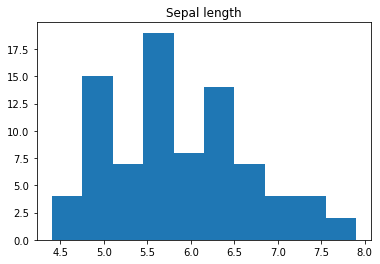

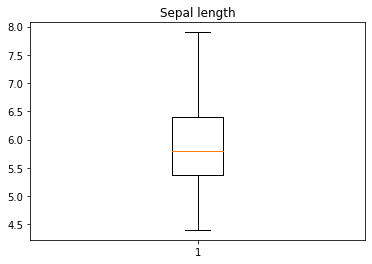

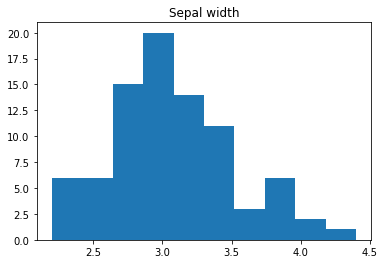

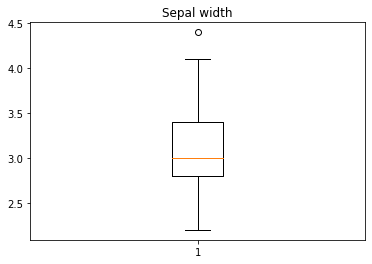

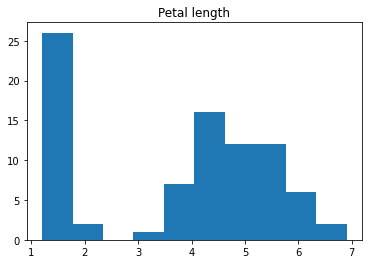

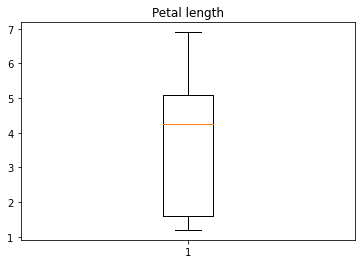

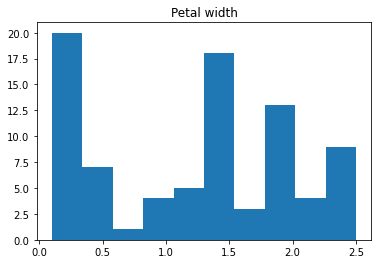

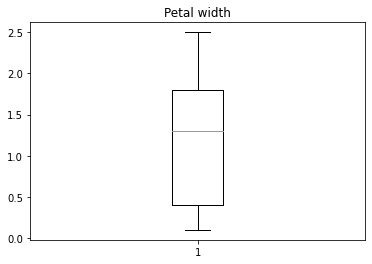

In [78]:
#Plotting the numeric columns 
numcols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in numcols:
    plt.hist(train[col])
    plt.title(col.replace('_', ' ').capitalize())
    plt.show()
    plt.boxplot(train[col])
    plt.title(col.replace('_', ' ').capitalize())
    plt.show()

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [79]:
frequency_table = train.groupby('species').species.agg(['count']).reset_index()
frequency_table 



,species,count
0,setosa,28
1,versicolor,28
2,virginica,28


<AxesSubplot:xlabel='species', ylabel='count'>

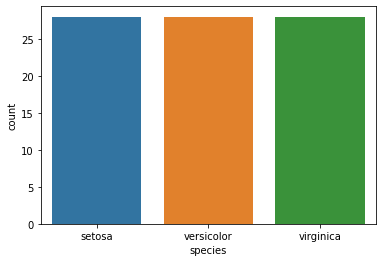

In [80]:
sns.barplot(data=frequency_table, x ='species', y='count')

- Document takeaways & any actions.

*Initial takeaways:*
- We observe a clear bimodal distribution on Petal length, which indicates a division between species based on this feature. ---> We can likely  utilize a means test on petal length to predict species. 
- We see large spikes in petal width which may also indicate a division between species. This could be another feature to conduct a means test on. 
- Sepal width looks like a very normal distribution. 

**3. Bivariate Stats**
- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

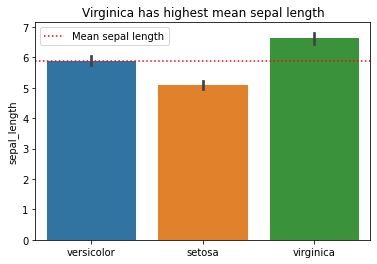

In [81]:
#Takeways visualized - Sepal Length
plt.title('Virginica has highest mean sepal length')
sns.barplot(x='species', y='sepal_length', data = train)
mean_sepal_length = train.sepal_length.mean()
plt.axhline(mean_sepal_length, label='Mean sepal length', color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

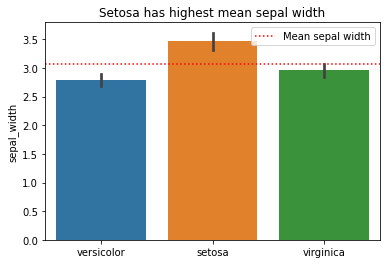

In [82]:
#Takeways visualized - Sepal Width
plt.title('Setosa has highest mean sepal width')
sns.barplot(x='species', y='sepal_width', data = train)
mean_sepal_width = train.sepal_width.mean()
plt.axhline(mean_sepal_width, label='Mean sepal width', color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

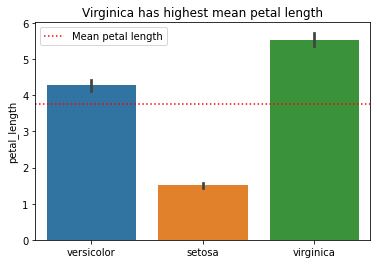

In [83]:
#Takeways visualized - Petal Length
plt.title('Virginica has highest mean petal length')
sns.barplot(x='species', y='petal_length', data = train)
mean_petal_length = train.petal_length.mean()
plt.axhline(mean_petal_length, label='Mean petal length', color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

*Takeway:* Setosa has a significantly smaller petal length than other two species

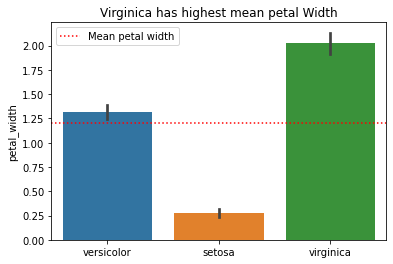

In [84]:
#Takeways visualized - Petal Width
plt.title('Virginica has highest mean petal Width')
sns.barplot(x='species', y='petal_width', data = train)
mean_petal_width = train.petal_width.mean()
plt.axhline(mean_petal_width, label='Mean petal width', color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

- For each measurement type, compute the descriptive statistics for each species.

In [85]:
train[train.species == 'virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.625000,2.960714,5.535714,2.021429
std,0.532378,0.318956,0.496815,0.293582
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.450000,3.000000,5.500000,2.000000
75%,6.900000,3.100000,5.800000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [86]:
train[train.species == 'setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.00000
mean,5.089286,3.467857,1.507143,0.27500
std,0.360390,0.427788,0.184448,0.12057
min,4.400000,2.300000,1.200000,0.10000
25%,4.875000,3.275000,1.400000,0.20000
50%,5.000000,3.400000,1.500000,0.20000
75%,5.400000,3.800000,1.600000,0.40000
max,5.800000,4.400000,1.900000,0.60000


In [87]:
train[train.species == 'versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.896429,2.796429,4.271429,1.314286
std,0.425556,0.280848,0.409930,0.199470
min,4.900000,2.300000,3.300000,1.000000
25%,5.600000,2.600000,4.000000,1.200000
50%,5.800000,2.800000,4.250000,1.300000
75%,6.125000,3.000000,4.525000,1.500000
max,6.900000,3.400000,5.100000,1.800000


- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [88]:
# Create variables for the subsets
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']
setosa = train[train.species == 'setosa']

In [89]:
# Mann-Whitney Test
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative='greater')
t, p

(767.0, 3.235595834904965e-10)

In [90]:
# Create loop operation that conducts mann-whitney test for other measurement types

test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for var in test_var:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('\n')

Comparing sepal_length between virginica and versicolor
676.5 1.541014598267054e-06


Comparing sepal_width between virginica and versicolor
510.0 0.02628629569922847


Comparing petal_length between virginica and versicolor
776.5 1.4739917857575313e-10


Comparing petal_width between virginica and versicolor
767.0 3.235595834904965e-10




- Document takeaways & any actions.

Takeways/actions: 
- Petal length and width seem to be key indicators of seperation between species
- Virginia has the longest petals
- Setosa has the shortest petals
- Setosa has wide and short sepals


**4. Multivariate Stats**
- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [91]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,14.82,3.50
36,5.5,3.5,1.3,0.2,setosa,19.25,0.26
133,6.3,2.8,5.1,1.5,virginica,17.64,7.65
95,5.7,3.0,4.2,1.2,versicolor,17.10,5.04
18,5.7,3.8,1.7,0.3,setosa,21.66,0.51


In [92]:
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]

In [93]:
x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

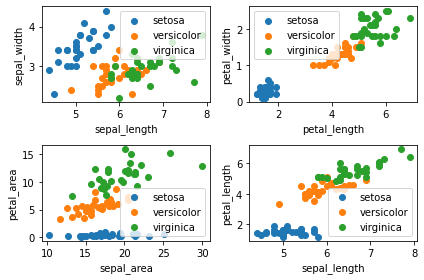

In [94]:
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])
plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])
plt.tight_layout()

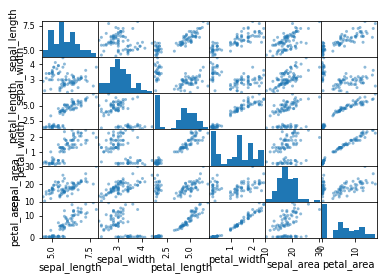

In [95]:
pd.plotting.scatter_matrix(train)
plt.show()

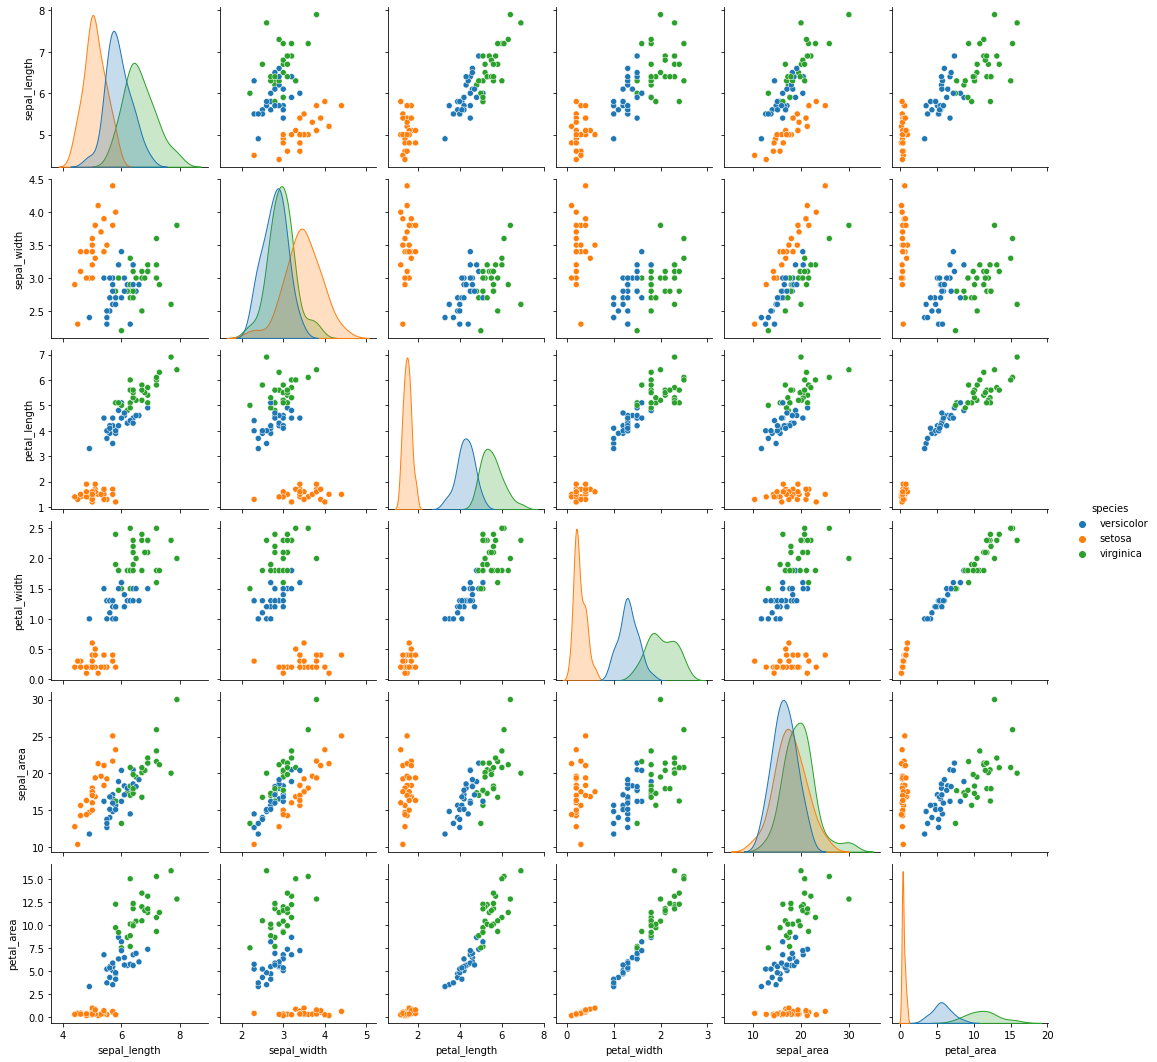

In [96]:
sns.pairplot(train, hue='species')
plt.show()

- Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

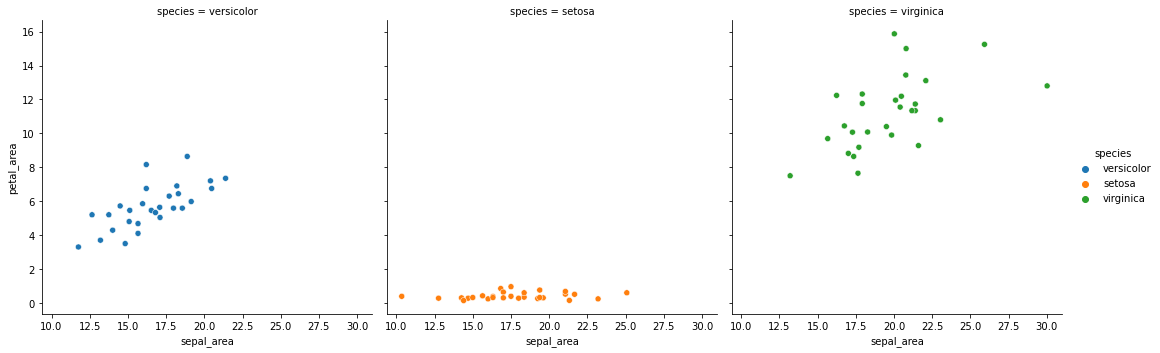

In [97]:
sns.relplot(data=train, x='sepal_area', y='petal_area', kind='scatter', hue='species', col='species')


- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [98]:
melted_all = train.melt()
melted_all.head()

,variable,value
0,sepal_length,5.7
1,sepal_length,5.5
2,sepal_length,6.3
3,sepal_length,5.7
4,sepal_length,5.7


<AxesSubplot:xlabel='variable', ylabel='value'>

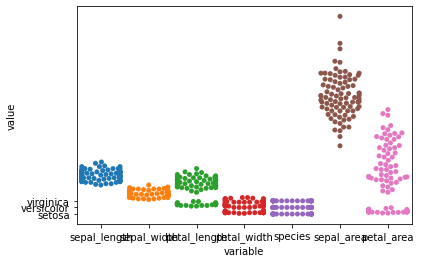

In [99]:
sns.swarmplot(x = 'variable', y='value', data=melted_all)

*Couldn't figure out how to include species as a hue once the df was melted...*

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

My question: Is sepal width significantly different between virginica and versicolor? 

alpha =.05

Hypothesis: 

H0: Sepal width is approximately the same between virginica and versicolor. 
Ha: Thre is a significant difference in sepal width between virginica and versicolor.

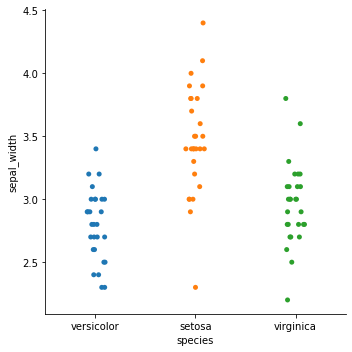

In [100]:
sns.catplot(data=train, x='species', y='sepal_width', kind='strip')

In [101]:
stats.mannwhitneyu(virginica.sepal_width, 
                   versicolor.sepal_width
                  )

MannwhitneyuResult(statistic=510.0, pvalue=0.05257259139845694)

- Document takeaways and any actions

The p value is slightly larger than the alpha so there is no statistically significant difference between the two species' sepal width. 